<a href="https://colab.research.google.com/github/DavidAlba/03MAIR---Algoritmos-de-Optimizacion/blob/main/Algoritmos_David_Alba_AG3_Segunda_parte).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instalación de librerias

#Algoritmos - Actividad Guiada 3 (2nd parte)


Nombre: David Alba<br>
URL: https://drive.google.com/drive/folders/1Ou0dJTX1KP5sChw5imzxd_cYUAPE3mLv?usp=drive_link

http:https://github.com/DavidAlba/03MAIR---Algoritmos-de-Optimizacion

#Algoritmo Genetico

In [2]:
!pip install requests
import urllib.request

!pip install tsplib95
import tsplib95

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.1 MB/s eta 0:00:00
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
  Attempting uninstall: networkx
    Found existing installation: networkx 3.5
    Uninstalling networkx-3.5:
      Successfully uninstalled networkx-3.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.25.2 requires networkx>=3.0, but you have networkx 2.8.8 which is incompatible.
nx-cugraph-cu12 25.2.0 requires networkx>=3.2, but you have networkx 2.8.8 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127

In [1]:
import random   #Libreria para generar numeros y listas aleatorias
import copy     #Permite hacer copias de objetos en python: listas, diccionarios,...

##Carga de datos del problema

In [5]:
#Librerias y carga del problema

#http://elib.zib.de/pub/mp-testdata/tsp/tsplib/
#Documentacion :
  # https://wwwproxy.iwr.uni-heidelberg.de/groups/comopt/software/TSPLIB95/tsp95.pdf
  # https://tsplib95.readthedocs.io/usage.html
  # https://tsplib95.readthedocs.io/modules.html#module-tsplib95.models

#Matriz de distancias
file = "swiss42.tsp" ;
urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/swiss42.tsp.gz", file + '.gz')
!gzip -d swiss42.tsp.gz     #Descomprimir el fichero de datos

#Objeto de tsplib95 para nuestro problema problema
problem = tsplib95.load(file)

#Nodos
Nodos = list(problem.get_nodes())
print(Nodos)

#Aristas
Aristas = list(problem.get_edges())
print(Aristas)

#Coordenadas(si estan disponibles en el ficher)
problem.get_display(1)

#Distancia
problem.get_weight(1, 2)



gzip: swiss42.tsp already exists; do you wish to overwrite (y or n)? n
	not overwritten
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (0, 23), (0, 24), (0, 25), (0, 26), (0, 27), (0, 28), (0, 29), (0, 30), (0, 31), (0, 32), (0, 33), (0, 34), (0, 35), (0, 36), (0, 37), (0, 38), (0, 39), (0, 40), (0, 41), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 28), (1, 29), (1, 30), (1, 31), (1, 32), (1, 33), (1, 34), (1, 35), (1, 36), (1, 37), (1, 38), (1, 39), (1, 40), (1, 41), (2, 0), (2, 1), 

34

##Funciones de la Actividad Guiada 3

In [6]:
#Funciones de la Actividad Guiada 3
#Se genera una solucion aleatoria con comienzo en en el nodo 0
def crear_solucion(Nodos):
  solucion = [Nodos[0]]
  for n in Nodos[1:] :
    solucion = solucion + [random.choice(list(set(Nodos) - set(solucion)))]
  return solucion

#Devuelve la distancia entre dos nodos
def distancia(a,b, problem):
  return problem.get_weight(a,b)


#Devuelve la distancia total de una trayectoria/solucion
def distancia_total(solucion, problem):
  distancia_total = 0
  for i in range(len(solucion)-1):
    distancia_total += distancia(solucion[i] ,solucion[i+1] ,  problem)
  return distancia_total + distancia(solucion[len(solucion)-1] ,solucion[0], problem)

##Funciones Auxiliares

In [16]:
# Genera una población inicial de tamaño N con soluciones aleatorias
def generar_poblacion(Nodos, N):
    """
    Crea una población de N soluciones aleatorias válidas.

    Args:
        Nodos: lista de nodos del problema.
        N: tamaño de la población.

    Returns:
        Una lista de soluciones (cada solución es una lista de nodos).
    """
    poblacion = []
    for _ in range(N):
        solucion = crear_solucion(Nodos)
        poblacion.append(solucion)
    return poblacion

# Crear una población de 10 soluciones
Nodos = list(problem.get_nodes())
poblacion_test = generar_poblacion(Nodos, 10)
print("La poblacion de prueba es:", poblacion_test)

La poblacion de prueba es: [[0, 40, 23, 8, 6, 17, 12, 5, 39, 25, 3, 32, 36, 15, 11, 18, 31, 14, 1, 9, 27, 34, 20, 7, 28, 22, 29, 10, 16, 33, 38, 37, 13, 21, 24, 30, 2, 26, 41, 35, 4, 19], [0, 37, 39, 16, 36, 35, 8, 29, 34, 41, 11, 30, 12, 32, 31, 13, 5, 2, 22, 38, 1, 6, 19, 7, 24, 17, 26, 33, 9, 3, 15, 23, 40, 10, 18, 25, 14, 21, 20, 4, 28, 27], [0, 3, 9, 13, 24, 1, 32, 4, 7, 28, 19, 21, 40, 31, 25, 18, 11, 16, 8, 22, 20, 38, 30, 29, 34, 23, 12, 41, 37, 26, 17, 2, 6, 15, 33, 35, 5, 10, 36, 27, 14, 39], [0, 15, 30, 18, 36, 7, 16, 41, 34, 23, 20, 4, 37, 17, 3, 27, 10, 33, 14, 12, 13, 2, 38, 39, 24, 8, 21, 25, 22, 31, 28, 9, 11, 35, 26, 5, 40, 6, 19, 1, 32, 29], [0, 28, 4, 20, 29, 37, 19, 30, 39, 38, 33, 23, 2, 10, 13, 31, 34, 36, 18, 41, 11, 21, 6, 27, 24, 25, 14, 40, 3, 16, 12, 26, 9, 17, 35, 1, 32, 7, 15, 5, 22, 8], [0, 38, 30, 19, 24, 35, 8, 18, 22, 1, 33, 23, 17, 14, 12, 2, 15, 41, 31, 20, 40, 13, 9, 7, 29, 3, 36, 39, 4, 11, 34, 28, 25, 16, 32, 37, 21, 27, 6, 26, 10, 5], [0, 3, 13, 2

In [18]:
# Evalua la población y devuelve la mejor solución encontrada
def Evaluar_Poblacion(poblacion, problem):
    """
    Evalúa todas las soluciones en la población.

    Args:
        poblacion: lista de soluciones (cada una es lista de nodos).
        problem: instancia del problema TSPLIB.

    Returns:
        (mejor_solucion, mejor_distancia)
    """
    mejor_solucion = None
    mejor_distancia = float('inf')

    for solucion in poblacion:
        distancia = distancia_total(solucion, problem)
        if distancia < mejor_distancia:
            mejor_distancia = distancia
            mejor_solucion = solucion.copy()

    return (mejor_solucion, mejor_distancia)

# Evaluar una población de prueba
mejor_sol, mejor_dist = Evaluar_Poblacion(poblacion_test, problem)
print("La mejor distancia encontrada en la prueba:", mejor_dist)

La mejor distancia encontrada en la prueba: 4298


In [38]:
def Descendencia_PMX(padres, problem, mutacion):
    """
    Genera dos hijos usando cruce PMX (Partially Matched Crossover) y mutación.

    Args:
        padres: lista de dos soluciones (padres).
        problem: instancia del problema.
        mutacion: probabilidad de mutación.

    Returns:
        Lista de dos hijos.
    """
    padre1, padre2 = padres
    n = len(padre1)

    # Seleccionar dos puntos de corte aleatorios
    punto1, punto2 = sorted(random.sample(range(1, n-1), 2))

    def pmx_crossover(p1, p2):
        hijo = [None] * n
        # Copiar el segmento intermedio
        hijo[punto1:punto2] = p1[punto1:punto2]
        # Mapeo de valores
        for i in range(punto1, punto2):
            if p2[i] not in hijo:
                pos = i
                while True:
                    val = p1[pos]
                    pos = p2.index(val)
                    if hijo[pos] is None:
                        hijo[pos] = p2[i]
                        break
        # Rellenar posiciones restantes
        for i in range(n):
            if hijo[i] is None:
                hijo[i] = p2[i]
        return hijo

    # Generar dos hijos
    hijo1 = pmx_crossover(padre1, padre2)
    hijo2 = pmx_crossover(padre2, padre1)

    # Mutación
    hijo1 = Mutar(hijo1, mutacion)
    hijo2 = Mutar(hijo2, mutacion)

    return [hijo1, hijo2]


In [45]:
#Funcion de cruce. Recibe una poblacion(lista de soluciones) y devuelve la población ampliada con los hijos.
# Todos los individuos de la población son selecionados para el cruce(si la población es par)
# Podría aplicarse un proceso previo de selección para elegir los individuos que se desea cruzar.
def Cruzar(poblacion, mutacion, problem):
    """
    Aplica cruce y mutación a la población.

    Args:
        poblacion: lista de soluciones (padres).
        mutacion: probabilidad de mutación.
        problem: instancia del problema.

    Returns:
        Lista de soluciones: padres + hijos.
    """
    nueva_poblacion = poblacion.copy()
    random.shuffle(nueva_poblacion)

    hijos = []

    # Emparejar padres de dos en dos
    for i in range(0, len(nueva_poblacion)-1, 2):
        padres = [nueva_poblacion[i], nueva_poblacion[i+1]]
        hijos.extend(Descendencia(padres, problem, mutacion))
        #hijos.extend(Descendencia_PMX(padres, problem, mutacion))


    # Combinar padres e hijos
    return nueva_poblacion + hijos


In [40]:
#Funcion para generar hijos a partir de 2 padres:
# Se elige el metodo de 1-punto de corte pero es posible usar otros n-puntos, uniforme, dependiendo del problema
def Descendencia(padres, problem, mutacion):
    """
    Crea dos hijos a partir de dos padres usando cruce de 1 punto y mutación.

    Args:
        padres: lista de dos soluciones (padres).
        problem: instancia del problema.
        mutacion: probabilidad de mutación (0-1).

    Returns:
        Lista de dos hijos factibilizados.
    """
    padre1, padre2 = padres
    n = len(padre1)

    # Selecciona un punto de corte al azar
    punto_corte = random.randint(1, n - 2)

    # Crossover de 1 punto
    hijo1 = padre1[:punto_corte] + padre2[punto_corte:]
    hijo2 = padre2[:punto_corte] + padre1[punto_corte:]

    # Arregla duplicados/faltantes
    hijo1 = Factibilizar(hijo1, problem)
    hijo2 = Factibilizar(hijo2, problem)

    # Aplica mutación
    hijo1 = Mutar(hijo1, mutacion)
    hijo2 = Mutar(hijo2, mutacion)

    return [hijo1, hijo2]


In [41]:
#Para el operador de cruce 1-punto los hijos generados no son soluciones(algunos nodos se repiten y otros no están)
def Factibilizar(solucion, problem):
    """
    Repara una solución que pueda tener nodos duplicados o ausentes.

    Args:
        solucion: lista de nodos (puede ser no válida).
        problem: instancia del problema.

    Returns:
        Una solución factible (lista de nodos).
    """
    Nodos = set(problem.get_nodes())
    n = len(solucion)

    # Detectar nodos que aparecen más de una vez
    usados = set()
    faltantes = []

    for i in range(n):
        if solucion[i] in usados:
            faltantes.append(i)
        else:
            usados.add(solucion[i])

    # Nodos que faltan en la solución
    nodos_faltantes = list(Nodos - usados)

    # Sustituir posiciones duplicadas por nodos faltantes
    for i, pos in enumerate(faltantes):
        solucion[pos] = nodos_faltantes[i]

    return solucion


In [42]:
#Funcion de mutación. Se eligen dos nodos y se intercambia. Se podrian añadir otros operaradores
# Se hace mutaciones mutacion% de las veces
def Mutar(solucion, mutacion):
    """
    Aplica mutación a una solución con probabilidad mutacion.

    Args:
        solucion: lista de nodos.
        mutacion: probabilidad (0-1).

    Returns:
        Solución posiblemente mutada.
    """
    if random.random() < mutacion:
        i, j = sorted(random.sample(range(1, len(solucion)), 2))
        solucion[i], solucion[j] = solucion[j], solucion[i]
    return solucion


In [43]:
#Funcion de seleccion de la población. Recibe como parametro una poblacion y
# devuelve una poblacion a la que se ha eliminado individuos poco aptos(fitness alto) y para mantener una poblacion estable de N individuos
#Se tiene en cuenta el porcentaje elitismo pasado como parametro
# Para los individuos que no son de la elite podríamos usar una selección de ruleta(proporcional a su fitness)
def Seleccionar(problem, poblacion, N, elitismo):
    """
    Selecciona N individuos de la población, manteniendo elitismo% como mejores soluciones.

    Args:
        problem: instancia del problema.
        poblacion: lista de soluciones (padres + hijos).
        N: tamaño deseado de la población final.
        elitismo: proporción de la población a mantener como elite (0-1).

    Returns:
        Nueva población seleccionada de tamaño N.
    """
    # Evaluar todas las soluciones con sus distancias
    evaluadas = [(sol, distancia_total(sol, problem)) for sol in poblacion]

    # Ordenar por distancia (fitness)
    evaluadas.sort(key=lambda x: x[1])

    # Número de elite a mantener
    n_elite = max(1, int(elitismo * N))

    elite = [e[0] for e in evaluadas[:n_elite]]

    # Resto de candidatos (no elite)
    resto_candidatos = [e[0] for e in evaluadas[n_elite:]]

    # Si necesitamos más individuos para llegar a N, seleccionamos al azar
    n_restantes = N - n_elite
    seleccionados = elite + random.sample(resto_candidatos, n_restantes)

    return seleccionados



##Proceso Principal


Ejecución 1/5
Distancia final: 1807
Tiempo: 18.79 s

Ejecución 2/5
Distancia final: 1697
Tiempo: 18.32 s

Ejecución 3/5
Distancia final: 1627
Tiempo: 18.73 s

Ejecución 4/5
Distancia final: 1895
Tiempo: 18.17 s

Ejecución 5/5
Distancia final: 1784
Tiempo: 20.02 s


,Ejecución,Distancia,Generaciones,Tiempo (s)
0,1,1807,300,18.79
1,2,1697,300,18.32
2,3,1627,300,18.73
3,4,1895,300,18.17
4,5,1784,300,20.02



Resumen estadístico:


,Ejecución,Distancia,Generaciones,Tiempo (s)
count,5.000000,5.000000,5.0,5.0000
mean,3.000000,1762.000000,300.0,18.8060
std,1.581139,103.256961,0.0,0.7281
min,1.000000,1627.000000,300.0,18.1700
25%,2.000000,1697.000000,300.0,18.3200
50%,3.000000,1784.000000,300.0,18.7300
75%,4.000000,1807.000000,300.0,18.7900
max,5.000000,1895.000000,300.0,20.0200


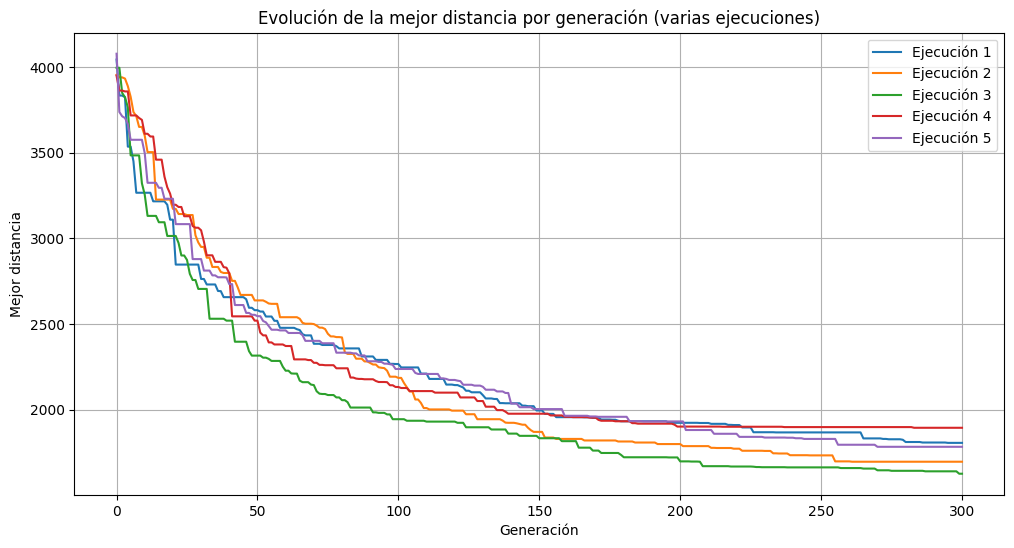

In [46]:
import time
import pandas as pd
import matplotlib.pyplot as plt

def algoritmo_genetico(problem=problem, N=100, mutacion=0.15, elitismo=0.1, generaciones=100):
    """
    Algoritmo genético con seguimiento de convergencia.

    Returns:
        mejor_solucion, historico_mejores
    """
    Nodos = list(problem.get_nodes())
    poblacion = generar_poblacion(Nodos, N)
    mejor_solucion, mejor_distancia = Evaluar_Poblacion(poblacion, problem)
    historico_mejores = [mejor_distancia]

    for gen in range(1, generaciones + 1):
        poblacion = Cruzar(poblacion, mutacion, problem)
        poblacion = Seleccionar(problem, poblacion, N, elitismo)
        mejor_solucion, mejor_distancia = Evaluar_Poblacion(poblacion, problem)
        historico_mejores.append(mejor_distancia)

    return mejor_solucion, historico_mejores

# ===========================================
# Ejecución múltiple y recopilación de datos
# ===========================================

num_ejecuciones = 5
N = 300
mutacion = 0.2
elitismo = 0.2
generaciones = 300

resultados = []

plt.figure(figsize=(12,6))

for i in range(num_ejecuciones):
    print(f"\nEjecución {i+1}/{num_ejecuciones}")
    tiempo_inicio = time.time()
    solucion, historico = algoritmo_genetico(
        problem=problem,
        N=N,
        mutacion=mutacion,
        elitismo=elitismo,
        generaciones=generaciones
    )
    tiempo_fin = time.time()

    distancia_final = historico[-1]
    duracion = tiempo_fin - tiempo_inicio

    print(f"Distancia final: {distancia_final}")
    print(f"Tiempo: {duracion:.2f} s")

    resultados.append({
        "Ejecución": i + 1,
        "Distancia": distancia_final,
        "Generaciones": generaciones,
        "Tiempo (s)": round(duracion, 2)
    })

    # Graficar evolución
    plt.plot(historico, label=f'Ejecución {i+1}')

# Mostrar tabla de resultados
df_resultados = pd.DataFrame(resultados)
display(df_resultados)

print("\nResumen estadístico:")
display(df_resultados.describe())

# Personalizar gráfica
plt.title("Evolución de la mejor distancia por generación (varias ejecuciones)")
plt.xlabel("Generación")
plt.ylabel("Mejor distancia")
plt.grid(True)
plt.legend()
plt.show()


# Análisis y conclusiones finales de netaheurísticas aplicadas al TSP

## Resumen comparativo de todos los experimentos

A continuación se sintetizan los principales resultados obtenidos con cada método:

| Método                              | Mejor Distancia | Media Distancia | Tiempo por ejecución | Variabilidad |
|-------------------------------------|-----------------|-----------------|----------------------|--------------|
| **Búsqueda Aleatoria**              | ~3,583          | ~3,700          | ~3 s                 | Muy Alta     |
| **Búsqueda Local Básica**           | ~1,623          | ~1,863          | ~3 s                 | Moderada     |
| **Búsqueda Local Avanzada**         | **1,336**       | ~1,367          | ~15 s                | Muy Baja     |
| **Recocido Simulado Mejorado**      | ~1,488          | ~2,133          | ~0.3 s               | Moderada     |
| **GA (100 gen, N=100, 1-Point)**    | ~2,225          | ~2,325          | ~2 s                 | Baja         |
| **GA (300 gen, N=100, 1-Point)**    | ~1,694          | ~1,879          | ~6 s                 | Baja     |
| **GA (300 gen, N=300, 1-Point)**    | ~1,594          | ~1,647          | ~18 s                | Baja         |
| **GA (300 gen, N=300, PMX)**        | ~1,617          | ~1,692          | ~18 s                | Baja         |

## Interpretación de resultados

- La **Búsqueda Aleatoria** fue el punto de partida, mostrando un rendimiento muy pobre y alta variabilidad.
- La **Búsqueda Local Básica** mejoró  la calidad, pero seguía sufriendo estancamiento en mínimos locales.
- La **Búsqueda Local Avanzada con multiarranque y entornos variables** logró las mejores soluciones de todo el estudio, con muy baja variabilidad y gran estabilidad.
- El **Recocido Simulado Mejorado** mostró buen compromiso entre calidad y tiempo de ejecución, aprovechando la aceptación probabilística para escapar de mínimos locales.
- El **Algoritmo Genético** fue muy sensible a sus parámetros:
  - Incrementar el número de generaciones de 100 a 300 redujo la distancia final en ~25%.
  - Aumentar el tamaño de la población de 100 a 300 mejoró todavía más la estabilidad y calidad de las soluciones.
  - El cambio de 1-point crossover a **PMX** generó convergencias más suaves y robustas, aunque la diferencia final en distancia fue moderada.
- Ningún enfoque genético alcanzó el rendimiento máximo de la Búsqueda Local Avanzada, pero los mejores experimentos de GA se aproximaron notablemente a las soluciones del Recocido Simulado.

## Fortalezas y debilidades por enfoque

**Búsqueda Aleatoria**

✅ Simplicidad extrema

❌ Calidad muy baja

**Búsqueda Local**

✅ Buena calidad en pocas iteraciones

❌ Estancamiento en mínimos locales

**Búsqueda Local Avanzada**

✅ Excelente calidad

✅ Variabilidad muy baja

❌ Mayor tiempo de ejecución

**Recocido Simulado**

✅ Capacidad de escapar de mínimos

✅ Tiempos bajos

❌ Mayor variabilidad de soluciones finales

**Genetic Algorithm**

✅ Capacidad de exploración global

✅ Mejora progresiva con generaciones y población

✅ Buena estabilidad con PMX

❌ Requiere más tiempo y ajuste de parámetros


## Complejidad computacional comparada

- Búsqueda Aleatoria: O(n)
- Búsqueda Local: O(n²) por iteración
- Recocido Simulado: O(n) por iteración
- GA: O(k × n) por iteración (con k= población), por número de generaciones
- GA con PMX: igual complejidad pero más coste constante por operación

## Reflexiones sobre estabilidad y aleatoriedad

- Los métodos deterministas como Búsqueda Local muestran menos variabilidad pero alta sensibilidad al punto inicial.
- El Recocido Simulado y los GA consiguen mejor exploración global, a costa de mayor dispersión de resultados si no se calibran bien.
- Las curvas de convergencia de los GA evidencian cómo la diversidad inicial (población) y la potencia de explotación (operador de cruce) determinan la capacidad de refinar soluciones.

## Propuestas de mejora futuras

- Aumentar generaciones a 500 o más
- Implementar otros operadores (Edge Recombination Crossover)
- Introducir estrategias de selección más avanzadas (torneo)
- Ajustar dinámicamente la probabilidad de mutación

## Conclusión general

El estudio demuestra la diferencia de rendimiento entre heurísticas simples y metaheurísticas sofisticadas:

- La Búsqueda Aleatoria apenas es útil como referencia.
- Las búsquedas locales pueden ser muy eficaces, pero necesitan mecanismos de diversificación.
- El Recocido Simulado y los Algoritmos Genéticos permiten equilibrar exploración y explotación con tiempos moderados y resultados robustos.
- La combinación de multiarranque, entornos variables y operadores avanzados es clave para acercarse a soluciones óptimas en problemas NP-Hard como el TSP.

En conjunto, el Algoritmo Genético configurado con población grande, número elevado de generaciones y PMX ha demostrado ser una estrategia eficaz que, con más refinamientos, podría superar a otras técnicas en calidad y estabilidad.
